<a href="https://colab.research.google.com/github/zakaria-aabbou/data_science_projects/blob/main/Computer%20Vision/Convert_image_to_ASCII_Allure_Intern_Test_Zakaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Allure Intern Test

The goal of this exercise is to convert an image into ASCII art like

 ![einstein.png](https://miro.medium.com/max/1400/1*B_bd4RYytGcw3ipAoJEJbg.jpeg)

We will do that using Pillow library to read the image and numpy library to manipulate it.

You will have 30 minutes to try to complete this notebook.

You are free to search the web for answers if you need.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

First we will download the base image and store it as an array

In [2]:
!wget http://www.hyperkommunikation.ch/image_p/einstein.png

--2022-02-19 18:43:26--  http://www.hyperkommunikation.ch/image_p/einstein.png
Resolving www.hyperkommunikation.ch (www.hyperkommunikation.ch)... 62.12.149.8
Connecting to www.hyperkommunikation.ch (www.hyperkommunikation.ch)|62.12.149.8|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65290 (64K) [image/png]
Saving to: ‘einstein.png.2’

einstein.png.2      100%[===================>]  63.76K   354KB/s    in 0.2s    

2022-02-19 18:43:27 (354 KB/s) - ‘einstein.png.2’ saved [65290/65290]



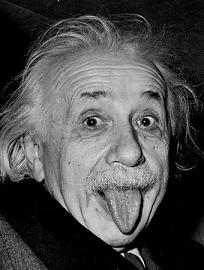

In [3]:
image = Image.open('einstein.png')
image

The image is loaded as color image. Before we can convert it to ASCII art, we should:
* Convert it to grayscale
* Make it smaller (100, 76)
* Load it into a numpy array

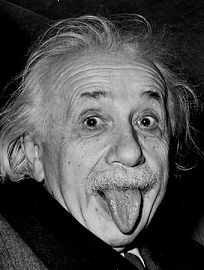

In [4]:
# convert to grayscle image
image_gray = image.convert('L')
image_gray

In [5]:
pixels_img = image_gray.getdata()
pixels_img

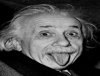

In [6]:
# resize
image_resized = image_gray.resize((100,76)) # width , height
image_resized

In [7]:
# Load it into a numpy array
image_to_array = np.array(image_resized)
image_to_array

array([[19, 24, 23, ..., 11, 14, 14],
       [13, 14, 14, ..., 12, 10, 10],
       [ 7, 11, 12, ...,  9, 11, 11],
       ...,
       [45, 69, 56, ...,  1,  1,  1],
       [43, 53, 69, ...,  1,  1,  1],
       [34, 47, 56, ...,  1,  1,  1]], dtype=uint8)

Show some statistic about this `array`:
* How many dimension it has ?
* Hence is the image color or gray scale ?
* what are the maximum, minimum and average value

In [8]:
# How many dimension it has ?
image_to_array.shape

(76, 100)

since we have the shape of the image is ((76, 100)) 2D  then it's a grayscale image.

In [9]:
print('The maximum value in the image array is : ',image_to_array.max())
print('The minimum value in the image array is : ',image_to_array.min())
print('The mean value in the image array is : ',image_to_array.mean())

The maximum value in the image array is :  208
The minimum value in the image array is :  0
The mean value in the image array is :  76.81934210526316


Print or Plot the distribution of values in the array

In [10]:
mu = image_to_array.mean()
sigma = image_to_array.std()

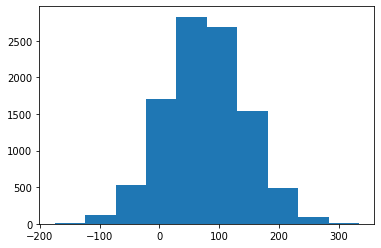

In [11]:
x = mu + sigma*np.random.randn(10000)
n, bins, patches = plt.hist(x)
plt.show()

We will create the output array with the same dimension as the image but with a `dtype = str`

We will affect the characters: #, &, %, |, o, /, . and ' ' to this new array depending on the value (black to white) of the input image

In [12]:
def Convert(string):
    list1=[]
    list1[:0]=string
    return list1

In [13]:
chars_str_70 = "$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~i!lI;:,\"^`"   # 70 levels of gray
chars_str_10 = "@%#*+=-:. "         # 10 levels of gray

chars_str_70_list = Convert(chars_str_70)
chars_str_10_list = Convert(chars_str_10)

chars_7 = ['#', '&', '%', '|', 'o', '/', ' '] # 7 levels of gray
chars_11 = ["B","S","#","&","@","$","%","*","!",":","."] # 11 levels of gray

In [14]:
intensity = 70 # adjust the intensity here

In [15]:
out_array = np.zeros(shape = image_to_array.shape , dtype= str)
list_of_pixels = []

In [16]:
for pixels_row in image_to_array:
    for pixel in pixels_row:
        list_of_pixels.append(chars_str_70_list[pixel//intensity])

In [17]:
length = len(list_of_pixels)
i = 0

In [18]:
# Iterating using while loop
while i < length:
    for x in range(image_to_array.shape[0]):
        for y in range(image_to_array.shape[1]):
            out_array[x][y] = list_of_pixels[i]
            i += 1

We can now print our result ASCII art using:

In [19]:
for i in range(out_array.shape[0]):
  print(''.join(out_array[i,:]))

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$@@@@@@$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$@@@@$$@@@@@@@@@$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
$$$$$$$$$$$$$$$$$$$$$$$$$$$@@@$$$$@@@$$$$@$$$$$$$@@@@@@$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
$$$$$$$$$$$$$$$$$$$$$$$$$$@$$$$$$@@@@@@@@@@@@@$$$$@@@@$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$@@$$@@@@@$$$@@@@$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
$$$$$$$$$$$$$$$$$$$$$$$$$$$$@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$